In [257]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.\\resources'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

.\resources\sampleSubmisssionFile.csv
.\resources\vehicle_test.csv
.\resources\vehicle_train.csv
.\resources\vehicle_training_labels.csv


# **Loading Data**

In [258]:
vehicle_csv=pd.read_csv(".\\resources\\sampleSubmisssionFile.csv")
vehicle_test=pd.read_csv(".\\resources\\vehicle_test.csv")
vehicle_train=pd.read_csv(".\\resources\\vehicle_train.csv")
vehicle_labels=pd.read_csv(".\\resources\\vehicle_training_labels.csv")

# The dataset has 846 observations/samples. 
# The dataset was divided training set (719 observations - vehicle_train.csv) and 
#  testing set (127 observations – vehicle_test.csv). 
# There are 18 numerical variables/features. 
# Training set actual class labels are provided in the “vehicle_training_label.csv” file 
#  (0 –bus, 1 – Opel Manta, 2 – Saab, 3 – Van).

In [259]:
#Shape of the dataset
print(vehicle_csv.shape)
print(vehicle_labels.shape)
print(vehicle_test.shape)
print(vehicle_train.shape)

(127, 2)
(719, 1)
(127, 19)
(719, 19)


# **EDA**

In [260]:
# drop ID
vehicle_train = vehicle_train.drop(['ID'],axis =1)
vehicle_test = vehicle_test.drop(['ID'],axis =1)

In [261]:
#Data type of the attributes
print(vehicle_csv.dtypes)

ID       int64
Class    int64
dtype: object


In [262]:
#Data type of the labels
print(vehicle_labels.dtypes)

#Display the training dataset
print(vehicle_labels.head())


Class    int64
dtype: object
   Class
0      0
1      3
2      3
3      1
4      2


In [263]:
#Display the training dataset
print(vehicle_train.head())

#Displaying the columns
print(vehicle_train.columns)

#Five point summary of the dataset
print(vehicle_train.describe().T)

#Data type of the attributes
print(vehicle_train.dtypes)

# null values check
print(vehicle_train.isnull().sum())

# info
print(vehicle_train.info())

   Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0    88    39      70     166          66         7      148     44   
1    85    35      64     129          57         6      116     57   
2    91    41      84     141          57         9      149     45   
3   102    54      98     177          56        10      219     31   
4    87    39      74     152          58         6      151     44   

   Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0            19         134           167           332     143          69   
1            17         125           138           200     123          65   
2            19         143           170           330     158          72   
3            25         171           219           706     223          72   
4            19         136           174           337     140          70   

   Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra  
0           5          13         193      201  


In [264]:
print(len(vehicle_train))
print(len(vehicle_test))
print(len(vehicle_labels))
print(len(vehicle_csv))

719
127
719
127


<Axes: >

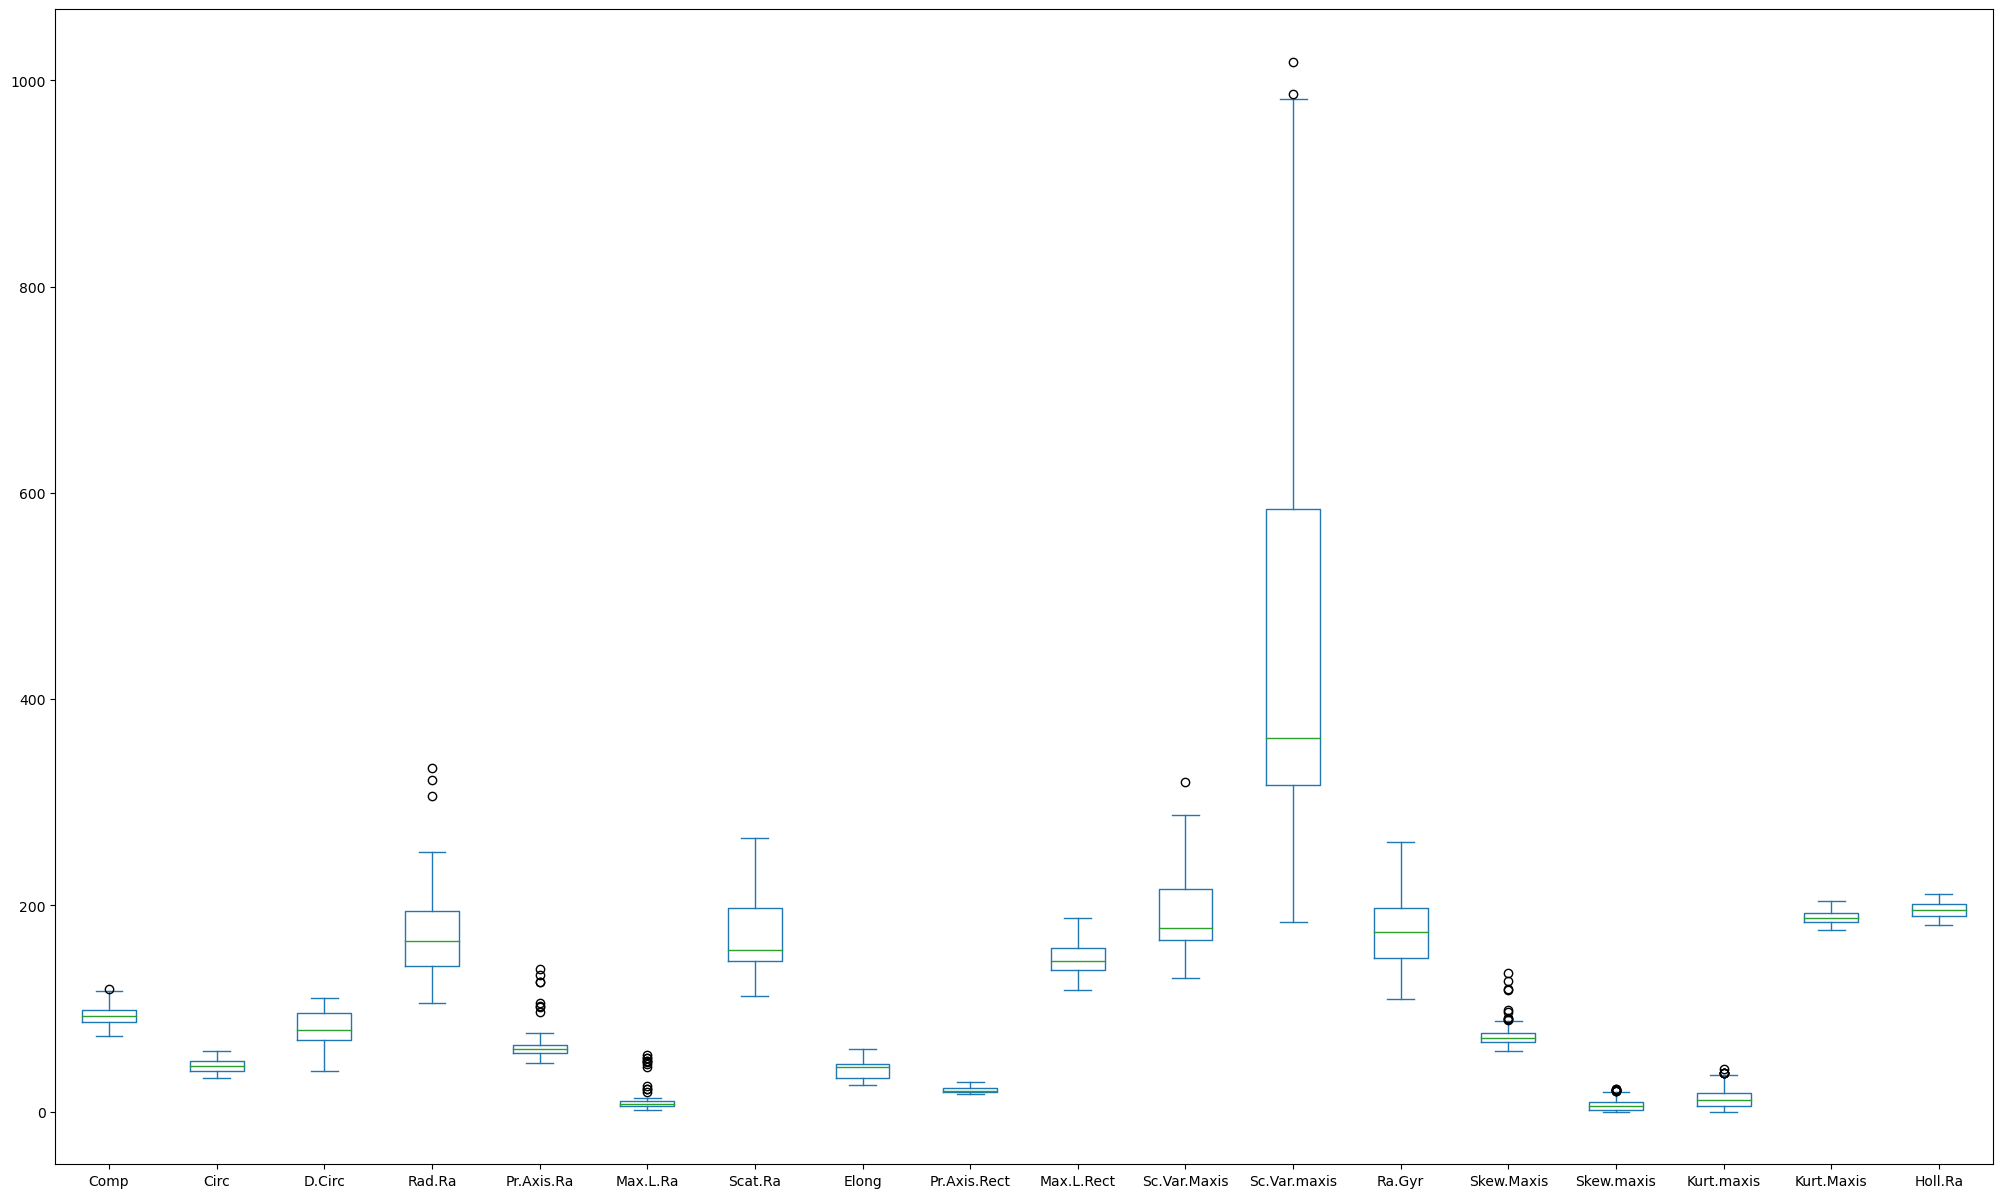

In [265]:
#Boxplot to understand spread and outliers
vehicle_train.plot(kind='box', figsize=(25,15))

array([[<Axes: title={'center': 'Comp'}>,
        <Axes: title={'center': 'Circ'}>,
        <Axes: title={'center': 'D.Circ'}>,
        <Axes: title={'center': 'Rad.Ra'}>],
       [<Axes: title={'center': 'Pr.Axis.Ra'}>,
        <Axes: title={'center': 'Max.L.Ra'}>,
        <Axes: title={'center': 'Scat.Ra'}>,
        <Axes: title={'center': 'Elong'}>],
       [<Axes: title={'center': 'Pr.Axis.Rect'}>,
        <Axes: title={'center': 'Max.L.Rect'}>,
        <Axes: title={'center': 'Sc.Var.Maxis'}>,
        <Axes: title={'center': 'Sc.Var.maxis'}>],
       [<Axes: title={'center': 'Ra.Gyr'}>,
        <Axes: title={'center': 'Skew.Maxis'}>,
        <Axes: title={'center': 'Skew.maxis'}>,
        <Axes: title={'center': 'Kurt.maxis'}>],
       [<Axes: title={'center': 'Kurt.Maxis'}>,
        <Axes: title={'center': 'Holl.Ra'}>, <Axes: >, <Axes: >]],
      dtype=object)

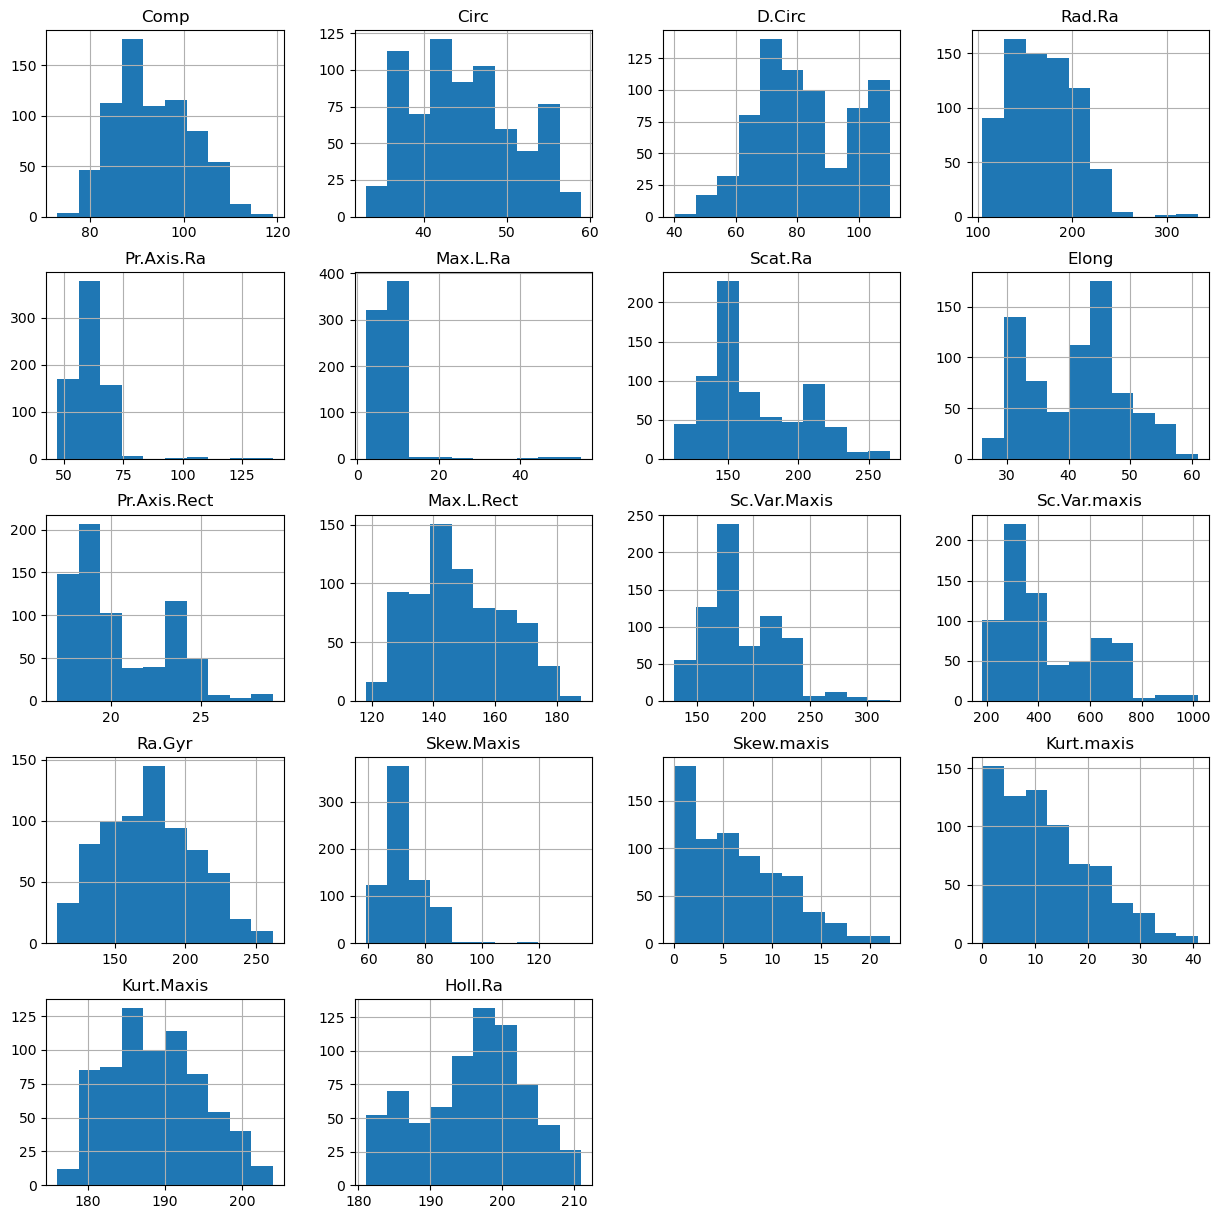

In [266]:
vehicle_train.hist(figsize=(15,15))

array([[<Axes: xlabel='Comp', ylabel='Comp'>,
        <Axes: xlabel='Circ', ylabel='Comp'>,
        <Axes: xlabel='D.Circ', ylabel='Comp'>,
        <Axes: xlabel='Rad.Ra', ylabel='Comp'>,
        <Axes: xlabel='Pr.Axis.Ra', ylabel='Comp'>,
        <Axes: xlabel='Max.L.Ra', ylabel='Comp'>,
        <Axes: xlabel='Scat.Ra', ylabel='Comp'>,
        <Axes: xlabel='Elong', ylabel='Comp'>,
        <Axes: xlabel='Pr.Axis.Rect', ylabel='Comp'>,
        <Axes: xlabel='Max.L.Rect', ylabel='Comp'>,
        <Axes: xlabel='Sc.Var.Maxis', ylabel='Comp'>,
        <Axes: xlabel='Sc.Var.maxis', ylabel='Comp'>,
        <Axes: xlabel='Ra.Gyr', ylabel='Comp'>,
        <Axes: xlabel='Skew.Maxis', ylabel='Comp'>,
        <Axes: xlabel='Skew.maxis', ylabel='Comp'>,
        <Axes: xlabel='Kurt.maxis', ylabel='Comp'>,
        <Axes: xlabel='Kurt.Maxis', ylabel='Comp'>,
        <Axes: xlabel='Holl.Ra', ylabel='Comp'>],
       [<Axes: xlabel='Comp', ylabel='Circ'>,
        <Axes: xlabel='Circ', ylabel='Circ'>,
  

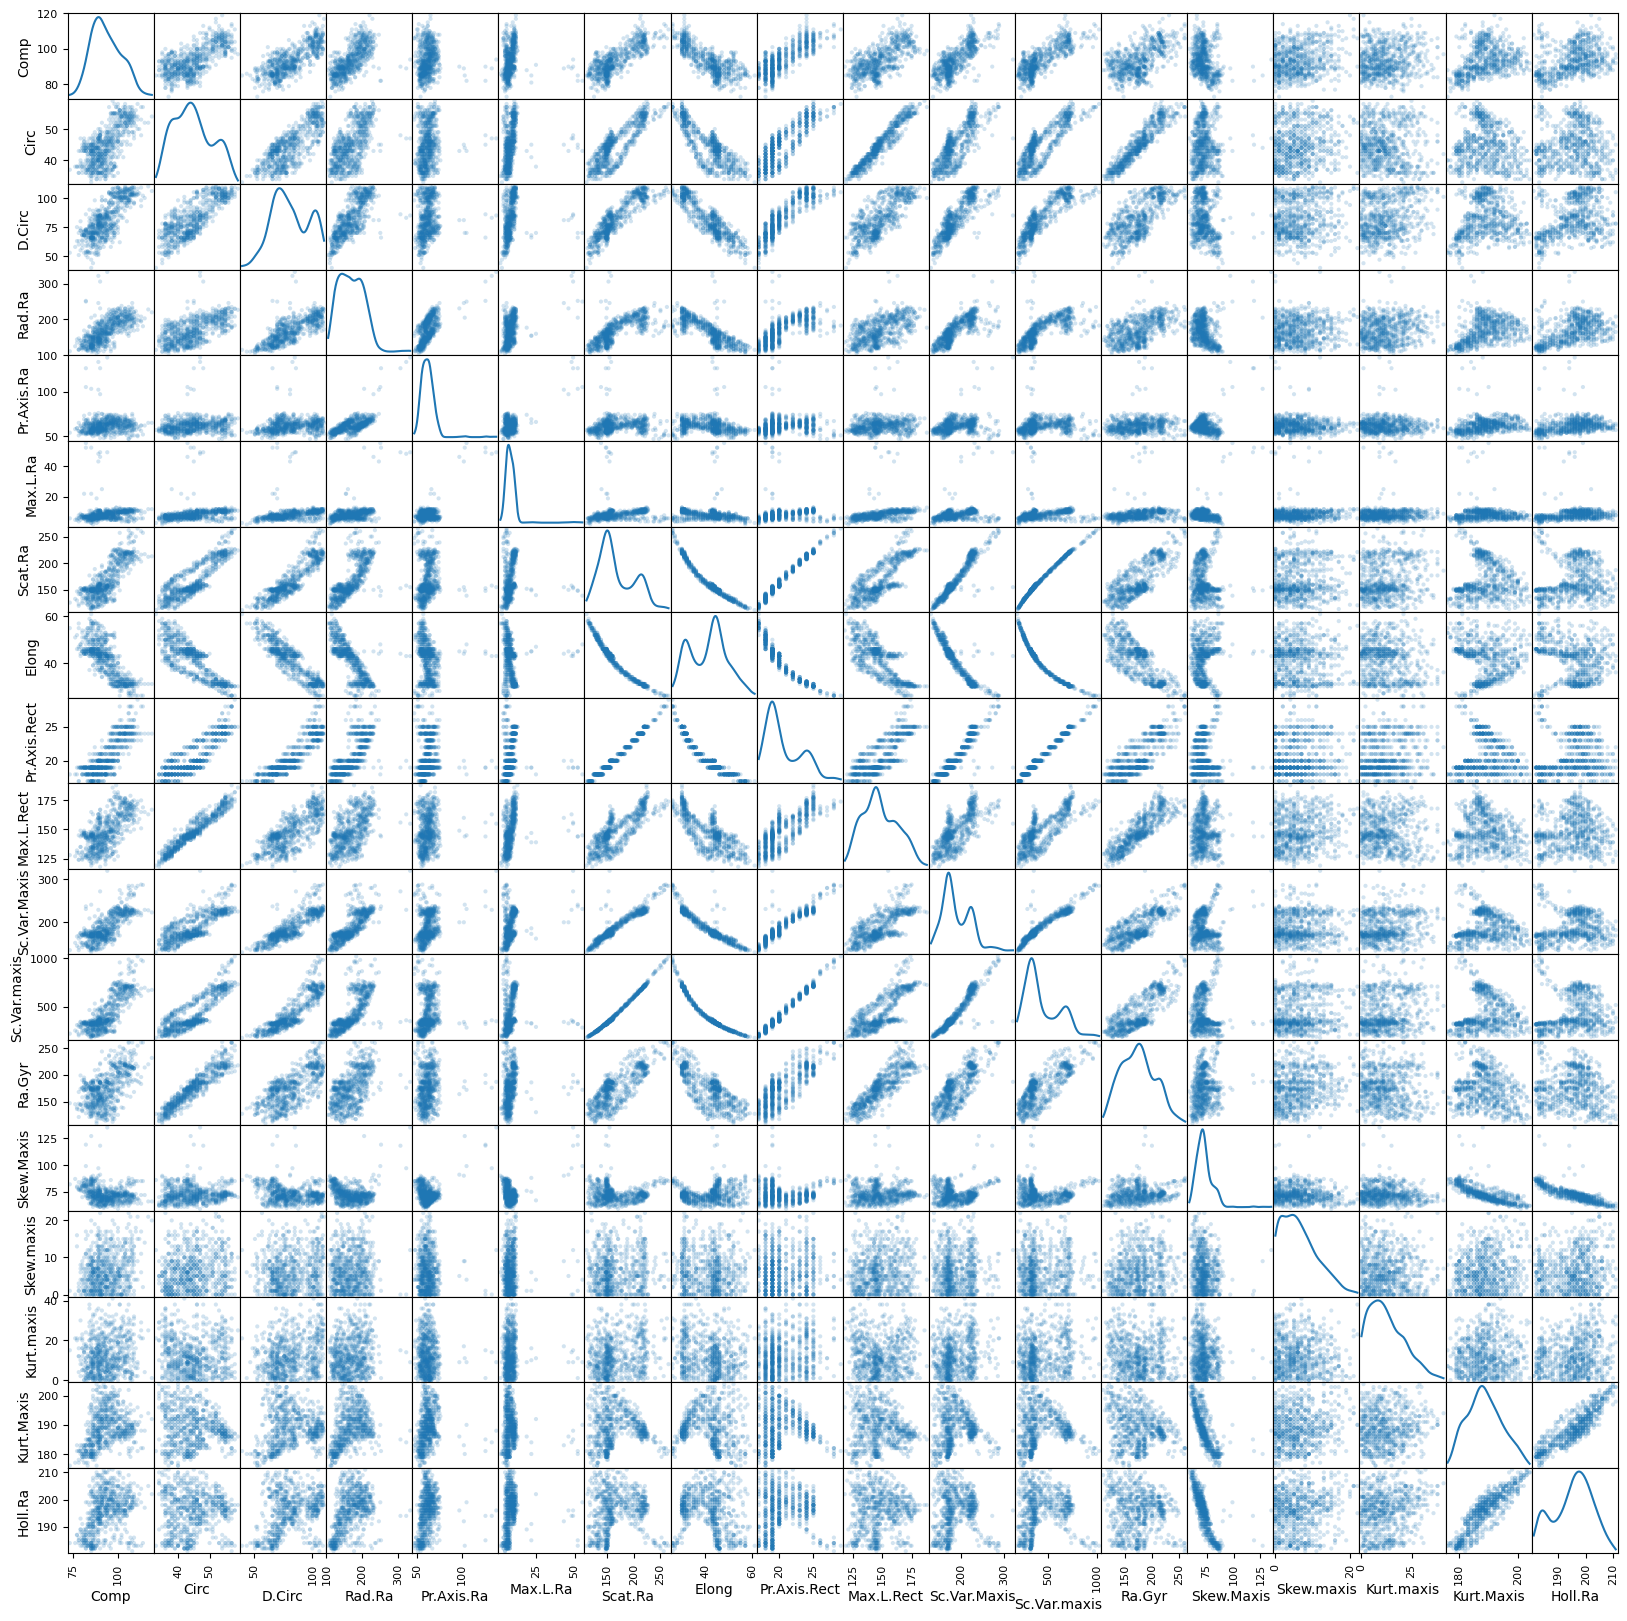

In [267]:
from pandas.plotting import scatter_matrix
scatter_matrix(vehicle_train, alpha=0.2, figsize=(20, 20),diagonal='kde')

In [268]:
#Create and view the correlation matrix
vehicle_train.corr()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
Comp,1.000000,0.685515,0.782416,0.681598,0.098000,0.120446,0.807686,-0.784352,0.808425,0.669999,0.756467,0.813816,0.584643,-0.249420,0.213224,0.136192,0.315362,0.370891
Circ,0.685515,1.000000,0.799001,0.621623,0.156770,0.234471,0.860339,-0.828911,0.857357,0.965119,0.803929,0.851841,0.938749,0.053117,0.137134,-0.041619,-0.103991,0.050379
D.Circ,0.782416,0.799001,1.000000,0.764652,0.168777,0.240817,0.905598,-0.910257,0.894926,0.773701,0.858005,0.887997,0.715118,-0.227167,0.118065,0.240566,0.155967,0.342472
Rad.Ra,0.681598,0.621623,0.764652,1.000000,0.679403,0.447076,0.736257,-0.788814,0.708706,0.565054,0.805961,0.725038,0.549433,-0.137810,0.053169,0.154588,0.382966,0.463067
Pr.Axis.Ra,0.098000,0.156770,0.168777,0.679403,1.000000,0.669598,0.117125,-0.193680,0.089976,0.134261,0.305815,0.104121,0.137493,0.208299,-0.054422,-0.035425,0.228666,0.257122
Max.L.Ra,0.120446,0.234471,0.240817,0.447076,0.669598,1.000000,0.146370,-0.157702,0.142009,0.291938,0.319976,0.125102,0.188278,0.348971,0.009765,0.018541,-0.045766,0.123778
Scat.Ra,0.807686,0.860339,0.905598,0.736257,0.117125,0.146370,1.000000,-0.973523,0.991787,0.809629,0.945460,0.996412,0.804632,-0.033373,0.068231,0.191242,0.021518,0.131811
Elong,-0.784352,-0.828911,-0.910257,-0.788814,-0.193680,-0.157702,-0.973523,1.000000,-0.949891,-0.773279,-0.932824,-0.957282,-0.771836,0.106339,-0.053248,-0.165277,-0.131054,-0.230072
Pr.Axis.Rect,0.808425,0.857357,0.894926,0.708706,0.089976,0.142009,0.991787,-0.949891,1.000000,0.812405,0.931380,0.992075,0.801218,-0.022921,0.074895,0.194278,-0.006111,0.109542
Max.L.Rect,0.669999,0.965119,0.773701,0.565054,0.134261,0.291938,0.809629,-0.773279,0.812405,1.000000,0.742417,0.796484,0.869801,0.040040,0.126961,-0.031125,-0.106711,0.081309


# **PCA analysis**

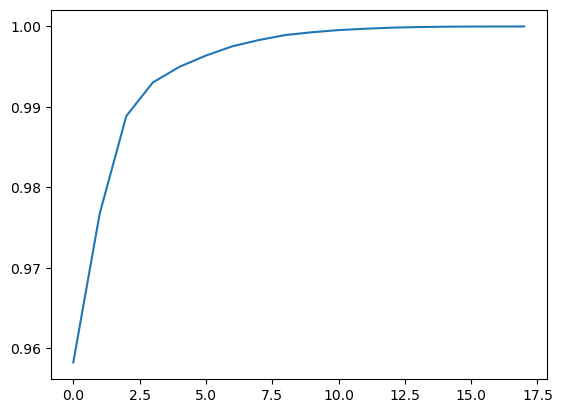

In [269]:
## There are several variables that are highly correlated with each other
#Run PCA and plot to visualise the ideal number of components
from sklearn.decomposition import PCA

pca = PCA().fit(vehicle_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [270]:
from sklearn.preprocessing import StandardScaler

# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
print("Sample data:\n", vehicle_train)
scaling.fit(vehicle_train)
Scaled_data=scaling.transform(vehicle_train)
print("\nScaled data:\n", Scaled_data)

#Based on the plot, we will select 10, 5, or 3 components
pca = PCA(n_components=15)
pca.fit(Scaled_data)

#Assign the components to the X variable
vehicle_train_trans = pca.transform(Scaled_data)

# Check the dimensions of data after PCA
print("\nTransformed Data\n",vehicle_train_trans)


Sample data:
      Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0      88    39      70     166          66         7      148     44   
1      85    35      64     129          57         6      116     57   
2      91    41      84     141          57         9      149     45   
3     102    54      98     177          56        10      219     31   
4      87    39      74     152          58         6      151     44   
..    ...   ...     ...     ...         ...       ...      ...    ...   
714   111    58     105     183          51         6      265     26   
715    93    43      76     149          57         7      149     44   
716    90    42      63     144          59         7      131     50   
717   101    56     101     231          72        10      217     31   
718    99    38      74     184          66         6      164     39   

     Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0              19         13

In [271]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [272]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV

model = SVC()

params = {'C': [0.01, 0.1, 0.5, 1, 10], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

model1 = GridSearchCV(model, param_grid=params, verbose=5)

model1.fit(vehicle_train_trans, vehicle_labels.values.ravel())

print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.653 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.715 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.694 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/5] END ...............C=0.01, kernel=poly;, score=0.431 total time=   0.0s
[CV 2/5] END ...............C=0.01, kernel=poly;, score=0.354 total time=   0.0s
[CV 3/5] END ...............C=0.01, kernel=poly;, score=0.361 total time=   0.0s
[CV 4/5] END ...............C=0.01, kernel=poly;, score=0.319 total time=   0.0s
[CV 5/5] END ...............C=0.01, kernel=poly;, score=0.350 total time=   0.0s
[CV 1/5] END ............C=0.01, kernel=sigmoid;, score=0.264 total time=   0.0s
[CV 2/5] END ............C=0.01, kernel=sigmoid

In [273]:
model = SVC()

params = {'C': [0.01, 0.1, 0.5, 1, 10], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

model1 = GridSearchCV(model, param_grid=params, verbose=5)

model1.fit(vehicle_train, vehicle_labels.values.ravel())

print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.799 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.799 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.840 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.785 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END ...............C=0.01, kernel=poly;, score=0.396 total time=   0.0s
[CV 2/5] END ...............C=0.01, kernel=poly;, score=0.375 total time=   0.0s
[CV 3/5] END ...............C=0.01, kernel=poly;, score=0.375 total time=   0.0s
[CV 4/5] END ...............C=0.01, kernel=poly;, score=0.396 total time=   0.0s
[CV 5/5] END ...............C=0.01, kernel=poly;, score=0.406 total time=   0.0s
[CV 1/5] END ............C=0.01, kernel=sigmoid;, score=0.264 total time=   0.0s
[CV 2/5] END ............C=0.01, kernel=sigmoid

# **SVC Model**

In [277]:
# Build the model with the best hyper parameters
# {'C': 10, 'kernel': 'rbf'}
# [CV 3/5] END ..................C=10, kernel=rbf;, score=0.792 total time=   0.0s

from sklearn.model_selection import cross_val_score

model = SVC(C=10, kernel="rbf")

scores = cross_val_score(model, vehicle_train_trans, vehicle_labels.values.ravel(), cv=15)

print(scores)

[0.77083333 0.75       0.79166667 0.85416667 0.875      0.77083333
 0.83333333 0.89583333 0.83333333 0.79166667 0.79166667 0.8125
 0.83333333 0.875      0.82978723]


In [278]:
# Use the Naive Bayes CLassifier with k fold cross validation
# {'C': 0.01, 'kernel': 'linear'}
# [CV 3/5] END .............C=0.01, kernel=linear;, score=0.840 total time=   0.0s

model = SVC(C=0.01, kernel="linear")

scores = cross_val_score(model, vehicle_train, vehicle_labels.values.ravel(), cv=15)

print(scores)

[0.79166667 0.8125     0.8125     0.77083333 0.85416667 0.75
 0.875      0.83333333 0.8125     0.79166667 0.83333333 0.70833333
 0.8125     0.8125     0.78723404]


In [279]:
model = SVC(C=10, kernel="rbf")
model.fit(vehicle_train_trans, vehicle_labels.values.ravel())

Scaled_data=scaling.transform(vehicle_test)
pca = PCA(n_components=15)
pca.fit(Scaled_data)
vehicle_test_trans = pca.transform(Scaled_data)

y_pred = model.predict(vehicle_test_trans)

accuracy = accuracy_score(vehicle_csv['Class'].values.ravel(), y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.23622047244094488


# **AgglomerativeClustering**

In [280]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [281]:
print(vehicle_labels['Class'].unique())

[0 3 1 2]


In [282]:
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [283]:
# Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. 
# If linkage is “ward”, only “euclidean” is accepted. 
# If “precomputed”, a distance matrix is needed as input for the fit method.

# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_pred = model.fit_predict(vehicle_train_trans)
print(len(model.labels_))
print(y_pred)

719
[3 3 1 0 3 1 1 3 0 3 3 3 3 3 3 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 3 3 3 0 0 3
 3 1 0 3 0 1 1 0 1 0 3 3 0 1 3 3 0 1 3 1 1 3 3 0 1 0 0 3 1 1 1 0 2 0 1 1 1
 0 1 1 1 3 0 0 0 0 0 0 1 0 3 3 0 3 3 1 1 1 0 1 1 0 1 3 1 1 1 0 3 0 0 0 1 3
 0 0 1 1 1 3 0 1 2 1 0 1 0 3 3 1 3 1 3 0 3 1 0 3 3 0 1 1 0 1 1 1 1 1 1 0 1
 3 0 3 3 1 0 1 3 0 3 1 0 3 1 3 0 0 0 1 0 3 1 3 0 0 3 0 1 1 0 3 3 0 0 3 0 3
 1 3 3 0 1 3 3 0 0 0 1 3 0 1 3 3 0 1 1 0 3 0 1 3 3 0 0 0 1 1 1 0 1 1 1 0 3
 1 3 1 3 0 0 0 3 0 1 0 1 3 1 1 3 1 0 1 3 1 1 3 1 1 3 1 0 1 1 1 0 1 3 1 1 1
 1 3 0 1 0 1 3 1 3 3 3 3 2 0 1 0 1 1 1 0 3 3 0 1 3 0 1 0 0 0 3 1 1 0 1 0 1
 1 0 3 0 3 3 0 0 0 3 0 1 0 0 0 1 0 0 0 1 0 1 1 3 1 1 1 0 1 0 3 0 3 1 0 1 1
 1 3 0 3 1 3 1 0 0 3 1 3 1 0 0 1 1 0 0 1 0 3 2 0 1 3 1 1 0 0 0 0 0 0 1 1 3
 0 0 0 0 3 1 1 3 3 0 0 3 1 1 0 1 3 1 1 1 1 0 0 0 3 1 1 0 1 3 3 1 3 3 2 1 1
 1 1 3 0 1 1 3 1 1 1 0 1 1 0 1 1 1 1 1 0 3 1 3 1 1 0 0 0 1 3 3 3 0 1 0 3 1
 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 3 1 1 1 3 1 3 3 1 3 0 3 0 3 3 3 1 0
 0 1 3 1 0 3 1 0 0 0 

In [284]:
print(f"orig: {vehicle_labels['Class'].values.ravel()}")
print(f"pred: {y_pred}")

orig: [0 3 3 1 2 3 3 0 0 1 3 2 0 2 1 1 0 3 0 3 1 3 2 0 2 1 1 2 2 1 3 1 3 3 1 0 3
 1 3 2 0 0 0 3 1 2 2 2 3 1 0 3 3 2 3 2 3 0 2 3 2 2 0 1 2 3 3 0 1 3 0 3 0 2
 2 3 1 1 2 0 2 1 1 2 2 3 2 2 1 2 0 1 0 0 3 1 2 0 0 1 3 2 0 0 2 1 1 1 1 0 0
 0 1 2 0 0 2 0 3 3 3 2 2 1 1 2 1 0 0 1 1 1 3 2 0 1 0 2 0 0 0 3 3 3 0 3 2 3
 3 0 1 3 1 0 3 0 2 0 1 2 0 3 3 1 1 1 2 1 3 3 3 0 2 1 1 0 0 2 3 3 1 2 3 2 0
 1 1 2 2 2 2 1 1 1 1 3 2 1 3 1 0 2 3 0 0 3 1 1 0 2 2 0 1 3 0 0 1 3 3 3 1 2
 0 2 1 0 2 2 0 0 1 3 2 3 3 1 0 1 2 2 3 2 3 1 3 3 3 3 3 0 0 3 1 2 3 2 0 3 1
 0 3 1 0 0 2 2 1 0 1 1 3 3 2 1 2 1 2 2 2 2 0 1 3 3 1 0 1 1 0 2 0 3 2 3 0 0
 3 1 3 2 3 1 2 1 1 2 2 0 0 1 1 0 2 2 2 1 1 3 1 0 1 0 1 2 0 1 2 1 0 3 1 0 1
 0 3 2 3 2 3 0 1 1 0 0 1 2 0 2 0 2 2 0 3 1 0 0 0 0 1 0 3 2 2 1 0 1 2 3 1 3
 1 2 1 2 0 0 3 0 3 2 2 2 1 3 2 0 1 2 3 3 3 2 2 1 3 3 1 1 2 3 3 0 3 1 0 3 1
 0 1 3 2 0 3 1 0 3 3 1 0 2 1 3 0 0 2 1 1 2 0 2 0 3 2 1 1 3 2 0 2 2 3 0 0 0
 3 0 1 1 2 3 1 2 3 0 0 0 2 0 3 1 0 3 3 3 2 2 3 3 3 2 1 0 1 2 0 0 3 1 1 3 2
 2 3 3 3 0 2 0 1 0 

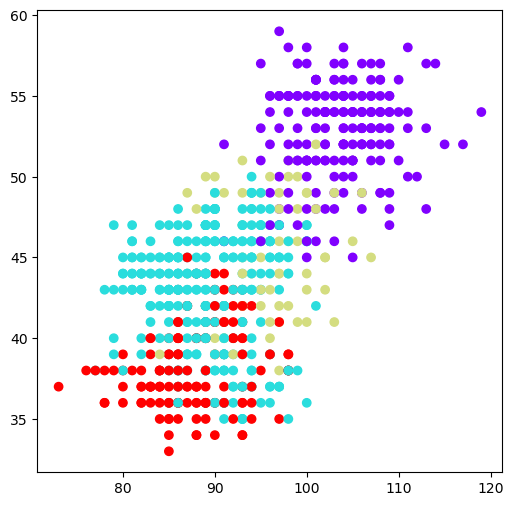

In [285]:
plt.figure(figsize =(6, 6)) 
plt.scatter(vehicle_train['Comp'], vehicle_train['Circ'], 
            c = model.fit_predict(vehicle_train), cmap ='rainbow') 
plt.show() 

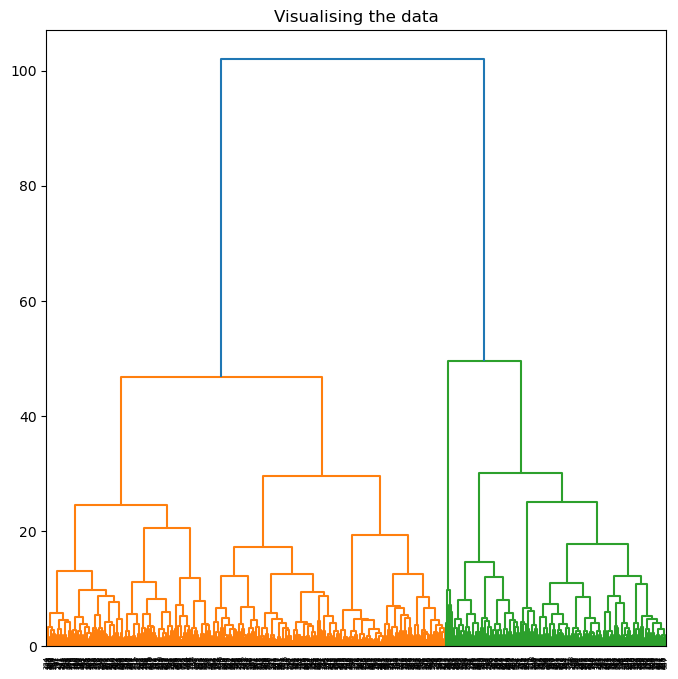

In [286]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(vehicle_train_trans, method ='ward'))) 

In [287]:
import itertools

def label_permute_compare(ytdf,yp,n=4):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    # your code here
    y_true = np.array(ytdf).reshape(-1)
    unique_labels = np.unique(y_true)      #list(set(yp))
    best_permutation = None
    best_accuracy = 0

    # Generate all possible permutations of the unique labels
    permutations = itertools.permutations(range(len(unique_labels)))
    
    # Compare each permutation
    for perm in permutations:
        
        # Create a mapping from current label to permuted label
        label_mapping = {old: new for old, new in zip(unique_labels, perm)}
        # Apply the label mapping to yp
        yp_permuted = np.array([label_mapping[label] for label in y_true])
        # Calculate the accuracy score
        accuracy = np.mean(yp_permuted == yp)
        if accuracy > 0.7:
            print(f"cbp: {best_permutation}")
            print(f"cba: {best_accuracy}")
            print(f"nbp: {perm}")
            print(f"nba: {accuracy}")
        
        # Update best permutation and accuracy if current one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = perm
            
    return best_permutation, best_accuracy
    

In [288]:
labelorder, acc = label_permute_compare(vehicle_labels, model.labels_)
print(labelorder, acc)

(1, 0, 2, 3) 0.4534075104311544


In [289]:
y_true = np.array(vehicle_labels).reshape(-1)
classes = np.unique(y_true)
cm = confusion_matrix( y_true, y_pred )

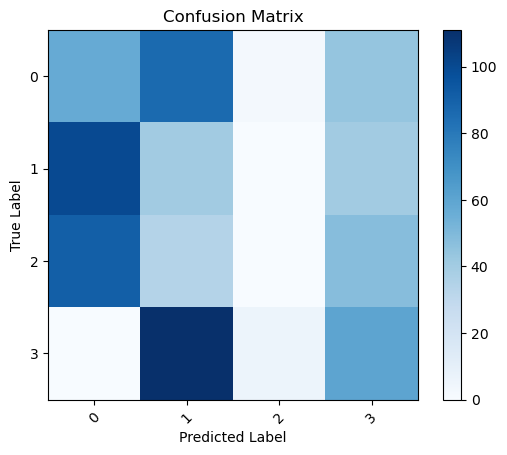

In [290]:
# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **KMeans**

In [291]:
model = KMeans(n_init='auto', n_clusters=4, random_state=50, max_iter=150)

y_pred = model.fit_predict(vehicle_train_trans)
print(len(model.labels_))
print(y_pred)

719
[1 1 1 2 1 3 1 1 2 1 1 3 1 1 1 2 3 3 1 3 2 1 3 3 2 2 2 2 3 3 3 1 1 1 2 2 1
 1 1 2 1 2 3 3 2 3 2 1 3 2 3 1 1 2 1 1 3 3 3 1 2 3 2 2 1 1 3 3 2 0 2 3 3 3
 2 3 1 3 1 1 2 2 2 2 2 3 2 1 1 2 1 1 3 1 3 2 3 3 2 3 1 3 3 3 2 1 2 2 2 3 1
 2 2 3 3 3 1 1 1 0 3 2 1 2 1 1 1 1 3 1 2 1 3 2 1 1 2 3 3 2 3 3 3 3 3 3 2 3
 1 2 1 1 3 1 3 1 2 1 3 2 1 3 1 2 2 2 3 2 1 3 1 2 2 1 2 1 3 1 1 1 2 1 1 2 1
 3 1 3 2 3 1 2 2 2 2 3 1 2 3 1 1 1 3 3 2 1 2 3 1 1 2 1 2 3 3 3 2 3 1 3 1 1
 3 1 3 1 1 2 2 1 2 3 2 3 1 1 3 1 3 2 3 1 1 3 1 3 3 1 3 2 3 3 3 2 3 1 3 3 3
 3 1 2 3 2 3 1 3 1 2 1 3 0 2 3 2 1 3 3 2 1 1 2 1 1 2 3 1 2 1 1 1 3 2 3 2 3
 3 1 1 1 1 3 2 2 2 1 1 3 1 2 2 3 2 2 2 3 2 3 3 1 1 3 3 1 3 2 1 2 1 3 2 1 3
 3 1 2 1 3 1 3 2 2 1 3 1 3 1 2 3 3 2 2 1 2 1 0 2 3 1 3 3 1 2 2 2 2 2 3 1 1
 2 2 2 2 1 3 1 1 1 2 2 1 3 3 2 3 1 3 3 3 3 2 2 1 1 1 3 2 3 1 1 3 1 1 0 3 3
 3 3 1 2 3 3 1 3 3 3 2 3 3 2 1 3 3 3 3 2 1 3 1 3 1 2 2 2 3 1 1 1 2 3 2 1 3
 3 3 3 2 2 3 2 2 3 3 3 2 2 2 3 2 1 3 3 1 3 3 3 1 3 1 1 3 1 2 1 2 1 1 1 3 2
 2 3 1 3 2 1 3 2 1 2 

C:\Users\subba\.conda\envs\MSDS\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [292]:
labelorder, acc = label_permute_compare(vehicle_labels, model.labels_)
print(labelorder, acc)

(3, 2, 0, 1) 0.35048678720445064


In [293]:
y_true = np.array(vehicle_labels).reshape(-1)
classes = np.unique(y_true)
cm = confusion_matrix( y_true, y_pred)

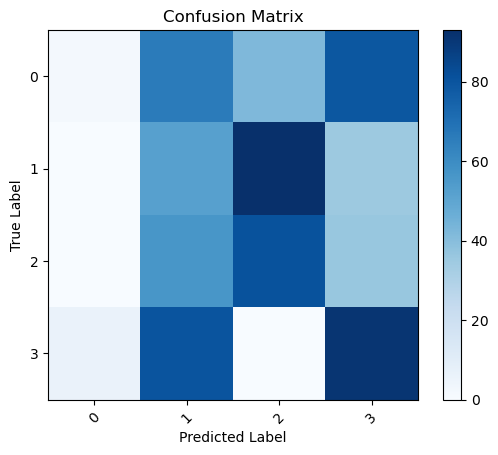

In [294]:
# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy scores
- SVC - 23.62%
- AG - 45.34%
- KMeans - 35.04%